In [1]:
import os
# When using on Juypter Notebook, uncomment the code below
# import sys
# path = os.path.join(os.path.dirname(os.getcwd()))
# sys.path.append(path) 
import warnings
warnings.filterwarnings("ignore")
from IPython.display import clear_output as clear
from models.MLModels import GeneralMLModels
from trainTest.datasets.common_dataset_utils import get_file_name, get_save_path
from trainTest.datasets.intra_ml_dataset_utils import get_ml_datasets
from trainTest.intra_train_test.train_test_ml_models import train_test_ml_models
from utils.common_utils import calculate_and_save_metrics, printlog
from utils.common_params import *

In [2]:
# 1. Parameter settings
subjects_list_global = list(['01', '02', '03', '04', '05', '31', '32', '33', '34', '35'])
total_exp_time = K_of_repeated_experiments if partitioning_method == 'repeated_experiments' else K_of_cross_validation 
settings = {'total_exp_time': total_exp_time}
# 2. Comparison of different denoising methods and machine learning classifiers
emg_denoise_methods = ['rawdata', 'WD-GT','WPD-GT', 'EMD-PE-GT', 'EMD-PE-SVD', 'ICEEMDAN-PE-GT', 'ICEEMDAN-PE-SVD']
classifiers = ['KNNClassifier', 'LDAClassifier', 'SVMClassifier', 'RFClassifier']


================================================================================2025-02-17 17:53:11
Denoising method: ICEEMDAN-PE-GT, model: RFClassifier

================================================================================2025-02-17 17:53:11
Subject: 35

================================================================================2025-02-17 17:53:11
Number of trails: 5 / 5
dataset_partitioning_method:  repeated_experiments
x_train.shape:  (575, 54) , y_train.shape:  (575,)
x_test.shape:  (144, 54) , y_test.shape:  (144,)
model: RFClassifier 
Parameter optimization by GridSearchCV: 
Fitting 5 folds for each of 91 candidates, totalling 455 fits
Optimized parameters:  {'max_depth': 9, 'n_estimators': 180}
Set the optimal parameters: 
Model training: 
Model test: 
Saving model: 
Test results: 
accuracy:  99.30556.
precision:  99.62264.
recall:  98.18182.
f1:  98.85714.
specificity:  99.78261.
npv:  99.85075.
Calculate confusion matrix: 
Confusion Matrix: 
[[28  0  0  0  0]

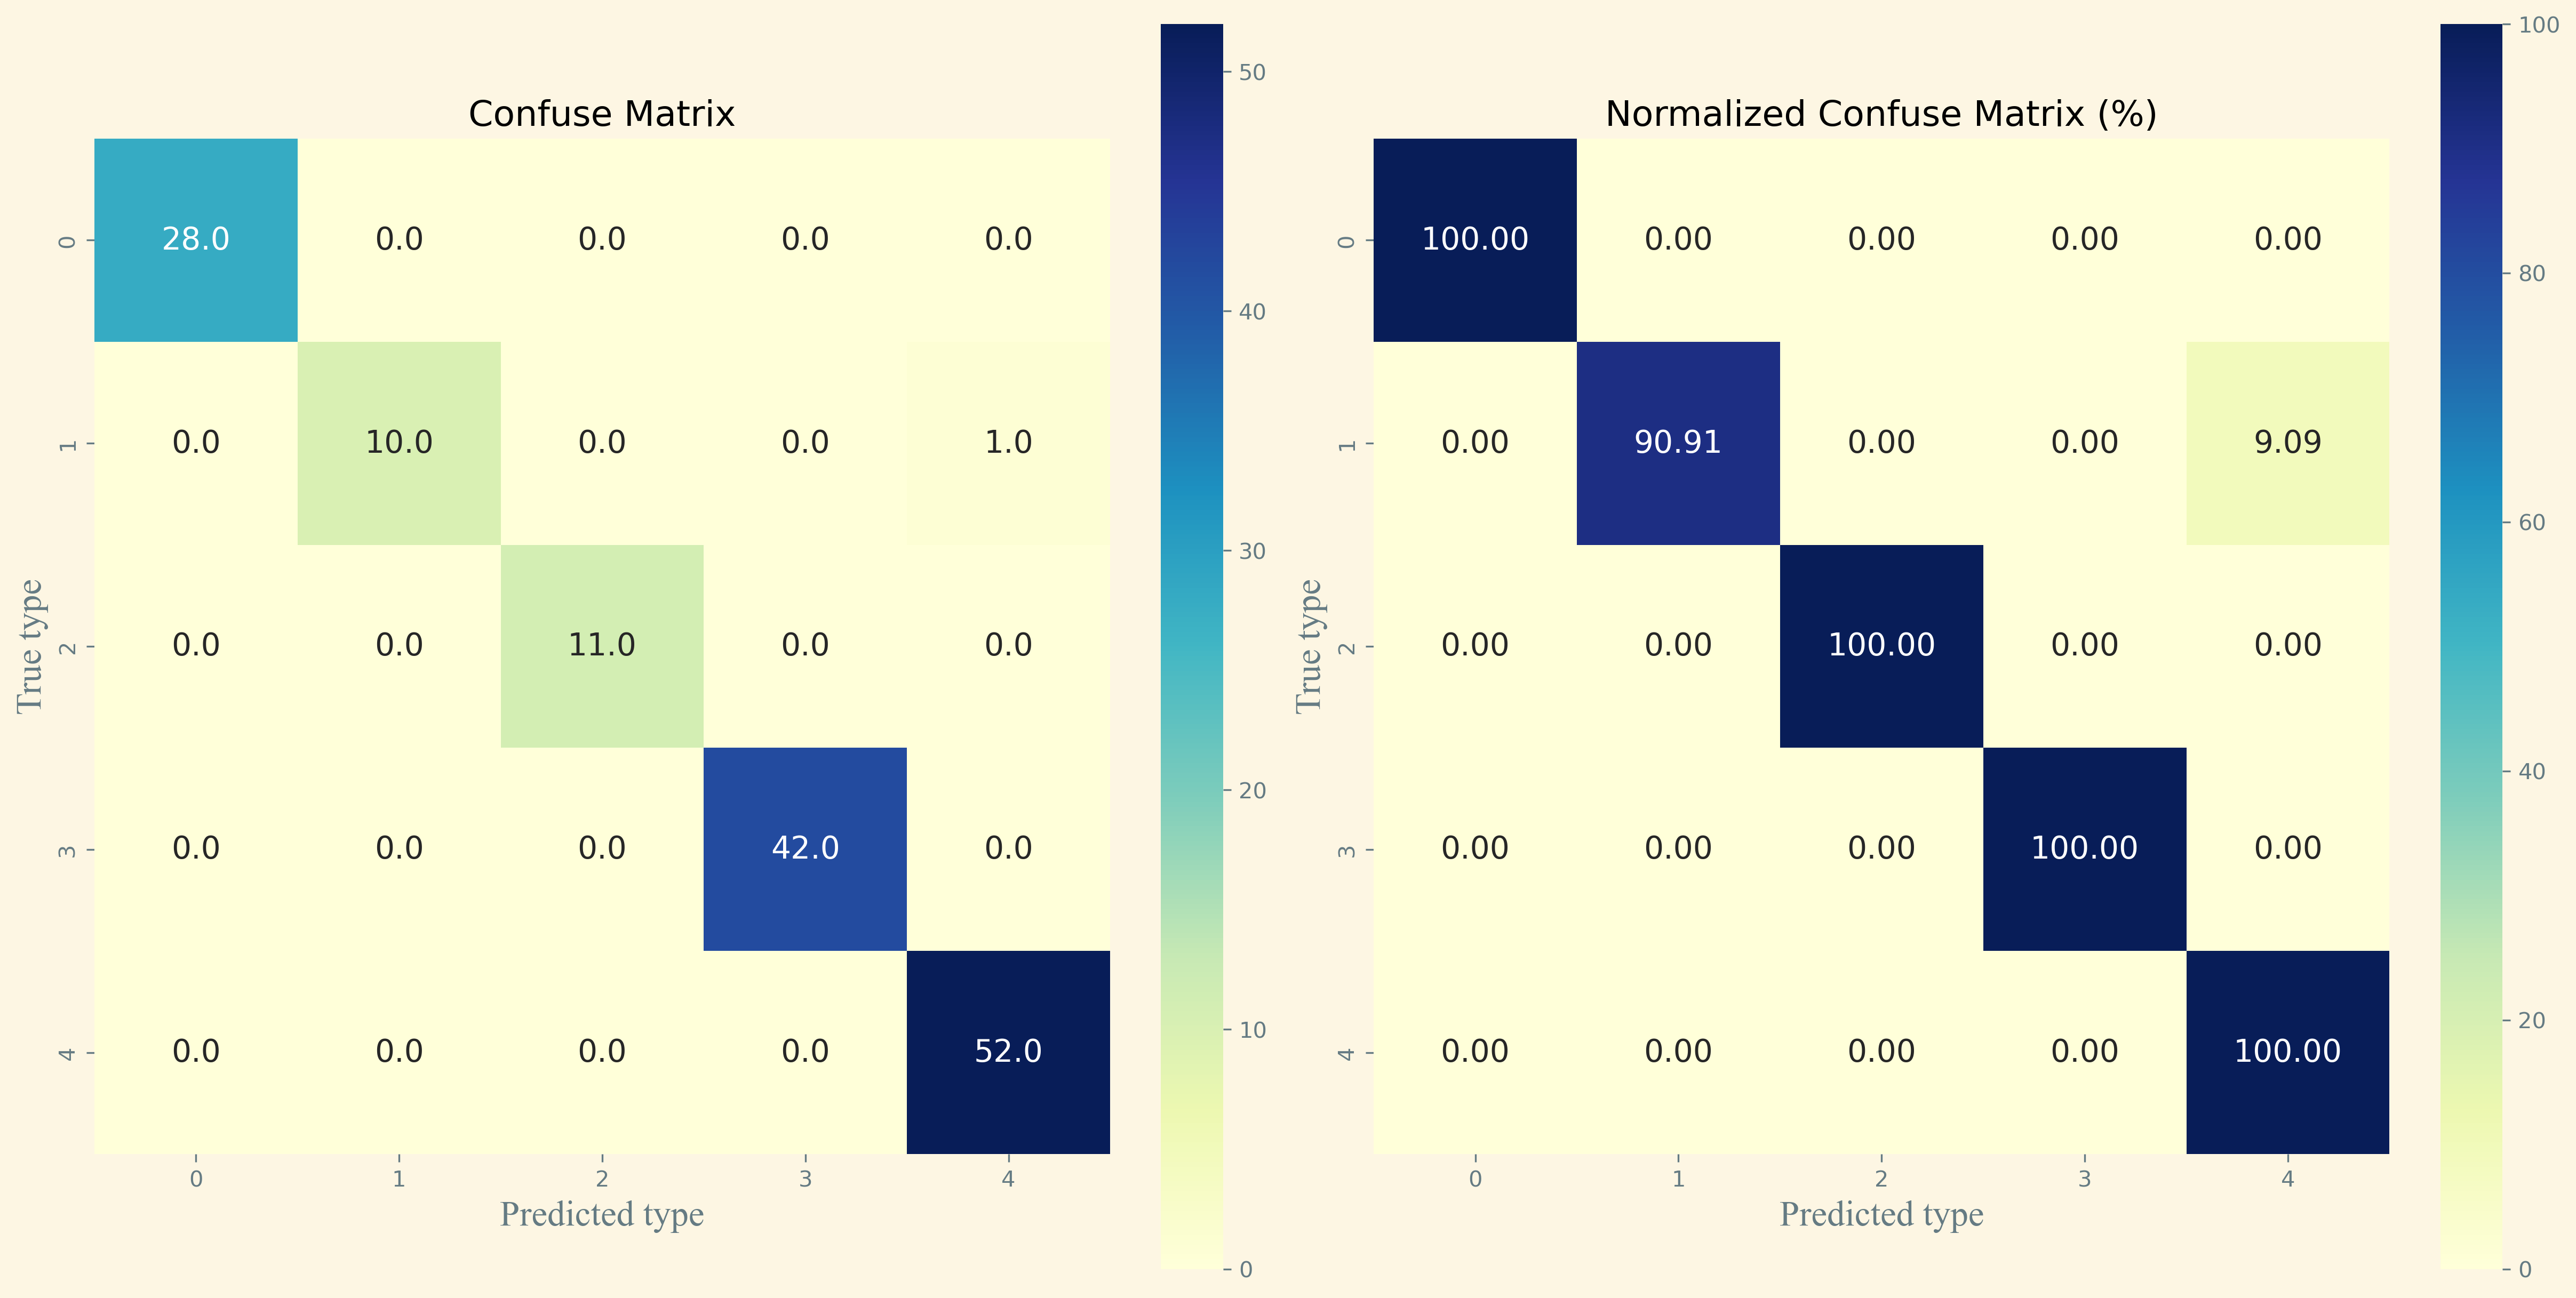

Saving the average results of all tested metrics for all subjects...
Saving the averaged results of the individual subject test metrics averaged...
All results saved!


In [3]:
for emg_denoise_method in emg_denoise_methods:
    file_path = os.path.join(os.path.dirname(os.getcwd()) , 'preProcessing', 'SIAT_LLMD_trainData', emg_denoise_method)
    basic_save_path = os.path.join(os.path.dirname(os.getcwd()), 'results', 'Intra_Machine_Learning', emg_denoise_method)
    
    for classifier in classifiers:
        model = GeneralMLModels(classifier)
        model_name = model.get_model_name()
        
        for subject_order in range(len(subjects_list_global)):
            subject = subjects_list_global[subject_order]
            file_name = get_file_name(file_path, subject, subjects_list_global)
            save_path = get_save_path(basic_save_path, model_name, subject)
            settings['save_path'] = save_path
            all_x_train, all_y_train, all_x_test, all_y_test = get_ml_datasets(file_name, feature_name='sub_emg_features', label_name='sub_motion_label_encoded')

            for exp_tim in range(total_exp_time):
                clear()
                x_train, y_train, x_test, y_test = all_x_train[exp_tim], all_y_train[exp_tim], all_x_test[exp_tim], all_y_test[exp_tim]
                current_exp_time = exp_tim + 1
                settings['current_exp_time'] = current_exp_time
                
                printlog(info='Denoising method: %s, model: %s'% (emg_denoise_method, model_name), time=True, line_break=False)
                printlog(info='Subject: %s' % subject, time=True, line_break=False)
                printlog(info='Number of trails: %d / %d' % (current_exp_time, total_exp_time), time=True, line_break=False)
                print('dataset_partitioning_method: ', partitioning_method)
                print('x_train.shape: ', x_train.shape, ', y_train.shape: ', y_train.shape)
                print('x_test.shape: ', x_test.shape, ', y_test.shape: ', y_test.shape)
                
                model = GeneralMLModels(classifier)
                train_test_ml_models(settings, model, x_train, y_train, x_test, y_test)

        path = os.path.join(basic_save_path, model_name)
        calculate_and_save_metrics(path, subjects_list_global) 